In [91]:
import pandas as pd
df=pd.read_csv('/content/Airbnb_Open_Data (1).csv')

<ipython-input-91-3128d2961eb5>:2: DtypeWarning: Columns (2,8,14,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Airbnb_Open_Data (1).csv')


Steps For Cleaning The Data

1. Understand the Data  
2. Handle Missing Value
3. Ensure Correct Data Types
4. Remove Duplicates
5. Outlier Detection

In [92]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102600 entries, 0 to 102599
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  float64
 1   NAME                            102350 non-null  object 
 2   host id                         102599 non-null  object 
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  object 
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [93]:
print(df.isnull().sum())

id                                     1
NAME                                 250
host id                                1
host_identity_verified               290
host name                            407
neighbourhood group                   30
neighbourhood                         17
lat                                    9
long                                   9
country                              533
country code                         132
instant_bookable                     106
cancellation_policy                   77
room type                              1
Construction year                    215
price                                248
service fee                          274
minimum nights                       410
number of reviews                    184
last review                        15894
reviews per month                  15880
review rate number                   327
calculated host listings count       320
availability 365                     450
house_rules     

1. Coulmn 'ID' (Primary Key)
It is UNIQUE identifier for each row
There is one missing value
Droping the row with the MISSING id value would be
preferable since it's a unique identifier, and without it, the record cannot be referenced

In [94]:
df=df.dropna(subset=['id']) # Drop rows with missing 'id'

In [95]:
df['NAME'] = df['NAME'].fillna('No Name Provided')  # Impute missing values with placeholder

In [96]:
df['host id'] = pd.to_numeric(df['host id'], errors='coerce')
df = df.dropna(subset=['host id'])  # Drop rows with missing 'host id'

In [97]:
df['host_identity_verified'] = df['host_identity_verified'].fillna('Unknown')  # Fill missing with 'Unknown'


<ipython-input-97-296ecb3ff368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_identity_verified'] = df['host_identity_verified'].fillna('Unknown')  # Fill missing with 'Unknown'


In [98]:
df['host name'] = df['host name'].fillna('No Host Name')  # Fill missing with placeholder


<ipython-input-98-3f4d7bacbe36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host name'] = df['host name'].fillna('No Host Name')  # Fill missing with placeholder


In [99]:
df['neighbourhood group'] = df['neighbourhood group'].fillna(df['neighbourhood group'].mode()[0])  # Fill missing with mode

<ipython-input-99-ff70bead1543>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['neighbourhood group'] = df['neighbourhood group'].fillna(df['neighbourhood group'].mode()[0])  # Fill missing with mode


In [100]:
df['neighbourhood'] = df['neighbourhood'].fillna(df['neighbourhood'].mode()[0])  # Fill missing with mode

In [101]:
# Check the Proportion of Missing Values in lat and long:
print(f"Missing lat values: {df['lat'].isnull().sum()} ({df['lat'].isnull().mean() * 100:.2f}%)")
print(f"Missing long values: {df['long'].isnull().sum()} ({df['long'].isnull().mean() * 100:.2f}%)")

# Since geolocation is critical to our analysis (e.g., mapping, spatial clustering, or distance calculations)
#removing rows ensures the remaining data is accurate and valid.
#since it's a very small percentage, removing the empty rows might be the cleaner solution.

df = df.dropna(subset=['lat', 'long'])  # Drop rows with missing geolocation data
df['long'] = pd.to_numeric(df['long'], errors='coerce')

Missing lat values: 8 (0.01%)
Missing long values: 8 (0.01%)


<ipython-input-101-0b7e7aab8088>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['long'] = pd.to_numeric(df['long'], errors='coerce')


In [102]:
# Fill missing values in the 'country' column with "United States"
df['country'] = df['country'].fillna("United States")


<ipython-input-102-f560681712aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].fillna("United States")


In [103]:
#Before dropping column 'country code', we need confirm that all entries in the country column are indeed "United States"
print(df['country'].unique())
# Output should show only "United States"


['United States']


In [104]:
# We will be dropping the country code column
# WHY?
# Redundancy

# it has no Analytical Value

# to Simplify the Dataset

# By dropping redundant columns, we can streamline our dataset,
# making it easier to explore, visualize, and model.
# Simpler datasets improve both interpretability and computational efficiency.

df = df.drop(columns=['country code'])


In [105]:
# Fill missing values with the most frequent value (mode)
df['instant_bookable'] = df['instant_bookable'].astype(bool)
df['instant_bookable'] = df['instant_bookable'].fillna(df['instant_bookable'].mode()[0])



In [106]:
df['cancellation_policy'] = df['cancellation_policy'].fillna(df['cancellation_policy'].mode()[0])  # Fill missing with mode


In [107]:
# Fill missing construction years with the mode
df['Construction year'] = pd.to_datetime(df['Construction year'], format='%Y', errors='coerce')
df['Construction year'] = df['Construction year'].fillna(df['Construction year'].mode()[0])


In [108]:
df['price'] = (
    df['price']
    .replace('', None)                        # Replace empty strings with None
    .str.replace('$', '', regex=False)        # Remove $ sign
)

In [109]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert to numeric
df['price'] = df['price'].fillna(df['price'].median())  # Impute missing with median

In [110]:
df['service fee'] = (
    df['service fee']
    .replace('', None)                        # Replace empty strings with None
    .str.replace('$', '', regex=False)        # Remove $ sign
)

In [111]:
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')  # Convert to numeric
df['service fee'] = df['service fee'].fillna(df['service fee'].median())

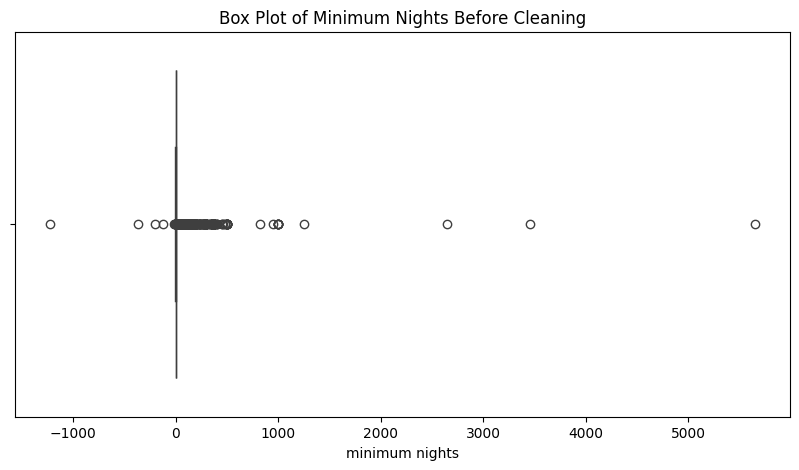

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['minimum nights'])
plt.title("Box Plot of Minimum Nights Before Cleaning")
plt.show()

5.0


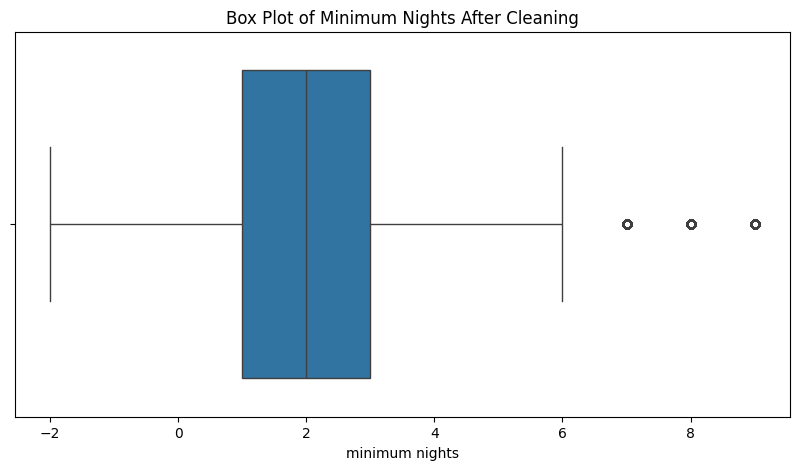

In [113]:

# Remove outliers using IQR
Q1 = df['minimum nights'].quantile(0.25)  # 25th percentile

Q3 = df['minimum nights'].quantile(0.75)  # 75th percentile
print(Q3)
IQR = Q3 - Q1  # Interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['minimum nights'] >= lower_bound) & (df['minimum nights'] <= upper_bound)]

# Visualising the cleaned data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['minimum nights'])
plt.title("Box Plot of Minimum Nights After Cleaning")
plt.show()


In [114]:
df = df[df['minimum nights'] >= 0]
print(df['minimum nights'].value_counts())

minimum nights
1.0    25418
2.0    23604
3.0    16113
4.0     6625
5.0     6050
7.0     4038
6.0     1537
8.0      246
9.0      157
Name: count, dtype: int64


In [115]:
df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce')  # Convert to numeric
df['number of reviews'] = df['number of reviews'].fillna(0)  # Replace missing values with 0

<ipython-input-115-67f8c95c61b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number of reviews'] = pd.to_numeric(df['number of reviews'], errors='coerce')  # Convert to numeric
<ipython-input-115-67f8c95c61b3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number of reviews'] = df['number of reviews'].fillna(0)  # Replace missing values with 0


In [116]:
# Step 1: Convert to datetime, coercing invalid values to NaT
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Step 2: Handle incomplete dates (rows the has only years)
df['last review'] = df['last review'].fillna(df['last review'].apply(lambda x: pd.to_datetime(f"{x}-01-01") if str(x).isdigit() else x))


<ipython-input-116-95842d281bc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last review'] = pd.to_datetime(df['last review'], errors='coerce')


In [117]:
df['reviews per month'] = df['reviews per month'].fillna(0)  # Replace missing values with 0
#print(df['reviews per month'].isna().sum())


In [118]:
df['review rate number'] = df['review rate number'].fillna(df['review rate number'].median())  # Impute missing with median


In [119]:
df['calculated host listings count'] = df['calculated host listings count'].fillna(df['calculated host listings count'].median()
)  # Impute missing with median

In [120]:
# Step 1: Check the original size of the DataFrame
print(f"Original number of rows: {df.shape[0]}")

# Step 2: Remove invalid values
# Filter out rows where 'availability 365' is less than 0 or greater than 365
# Retain NaN values while removing invalid numbers
df = df[((df['availability 365'] >= 0) & (df['availability 365'] <= 365)) | (df['availability 365'].isna())]


# Step 3: Check the cleaned size of the DataFrame
print(f"Number of rows after removing invalid availability values: {df.shape[0]}")

# Step 4: Optional - Reset index
df.reset_index(drop=True, inplace=True)

Original number of rows: 83788
Number of rows after removing invalid availability values: 81085


In [121]:
df['house_rules'] = df['house_rules'].fillna('Unknown')  # Replace missing with placeholder

<ipython-input-121-a465081af1d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['house_rules'] = df['house_rules'].fillna('Unknown')  # Replace missing with placeholder


In [122]:
df.drop(columns='license',inplace=True) # Drop column due to too many missing values(above 99%)

<ipython-input-122-53b239fdd085>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='license',inplace=True) # Drop column due to too many missing values(above 99%)


In [123]:
df['neighbourhood group'] = df['neighbourhood group'].str.strip().str.lower()
df['neighbourhood group'] = df['neighbourhood group'].replace({
    'brookln': 'brooklyn',
    'manhatan': 'manhattan',
    'staten is': 'staten island'
}, regex=False)
print(df['neighbourhood group'].unique())

['manhattan' 'brooklyn' 'queens' 'bronx' 'staten island']


In [124]:
df['last review'] = df['last review'].apply(lambda x: x.replace(year=2022) if x.year > 2022 else x)
print(df['last review'].max())

2022-06-16 00:00:00


In [125]:
# Remove duplicates
df = df.drop_duplicates()

# Reset index after cleaning
df = df.reset_index(drop=True)
# Save cleaned data
df.to_excel('cleaned_Airbnb_dataset.xlsx', index=False)

# Summary of missing values after cleaning
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 id                                    0
NAME                                  0
host id                               0
host_identity_verified                0
host name                             0
neighbourhood group                   0
neighbourhood                         0
lat                                   0
long                                  0
country                               0
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                                 0
service fee                           0
minimum nights                        0
number of reviews                     0
last review                       38661
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                    359
house_rules                           0
dtype: i

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80986 entries, 0 to 80985
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              80986 non-null  float64       
 1   NAME                            80986 non-null  object        
 2   host id                         80986 non-null  float64       
 3   host_identity_verified          80986 non-null  object        
 4   host name                       80986 non-null  object        
 5   neighbourhood group             80986 non-null  object        
 6   neighbourhood                   80986 non-null  object        
 7   lat                             80986 non-null  float64       
 8   long                            80986 non-null  float64       
 9   country                         80986 non-null  object        
 10  instant_bookable                80986 non-null  bool          
 11  ca

In [127]:
#default_lat, default_lon = 37.0902, -95.7129  # Geographic center of the U.S.
#df['lat'].fillna(default_lat, inplace=True)
#df['long'].fillna(default_lon, inplace=True)